In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
import os
from typing import List, Dict, Optional
import asyncio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [123]:
from proj.data.load import load_ibkr_prices
from proj.config import *
from proj.features import transforms

In [124]:
plt.style.use("styler.mplstyle") 

In [125]:
DURATION = "10 Y"

### Energy Sector and NYSE 

In [126]:

file_path = os.path.join(DATA, 'nyse.csv')
tickers = pd.read_csv(file_path)

In [127]:
energy_sector = tickers[tickers['Sector'] == 'Energy'].sort_values(by=['Market Cap'], ascending=False)

In [128]:
energy_sector

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
2133,XOM,Exxon Mobil Corporation Common Stock,$117.22,2.720,2.376%,4.943362e+11,United States,NaN,17177678,Energy,Integrated oil Companies
521,CVX,Chevron Corporation Common Stock,$155.02,2.080,1.36%,3.145728e+11,United States,NaN,9835318,Energy,Integrated oil Companies
466,COP,ConocoPhillips Common Stock,$86.83,1.170,1.366%,1.084457e+11,United States,NaN,7567444,Energy,Integrated oil Companies
1273,MPC,Marathon Petroleum Corporation Common Stock,$193.76,1.040,0.54%,5.824474e+10,United States,NaN,2174154,Energy,Integrated oil Companies
677,EOG,EOG Resources Inc. Common Stock,$105.41,0.410,0.39%,5.755317e+10,United States,NaN,7052616,Energy,Oil & Gas Production
...,...,...,...,...,...,...,...,...,...,...,...
2040,VOC,VOC Energy Trust Units of Beneficial Interest,$2.885,0.035,1.228%,4.904500e+07,United States,2011.0,122590,Energy,Oil & Gas Production
1592,PRT,PermRock Royalty Trust Units of Beneficial Int...,$3.8901,0.009,0.232%,4.732591e+07,United States,2018.0,25601,Energy,Oil & Gas Production
491,CRT,Cross Timbers Royalty Trust Common Stock,$7.77,0.160,2.102%,4.662000e+07,United States,1992.0,19153,Energy,Oil & Gas Production
1371,NINE,Nine Energy Service Inc. Common Stock,$0.5001,0.000,0.00%,2.168501e+07,United States,2018.0,2064948,Energy,Oilfield Services/Equipment


In [129]:
market_contribution = tickers[tickers['Sector'] == 'Energy']['Market Cap'].sum() / tickers['Market Cap'].sum()
print(f"Market Contribution of Energy Stocks: {market_contribution :.2f} %")

Market Contribution of Energy Stocks: 0.05 %


In [130]:
top_5 = energy_sector['Symbol'].head(5).to_list()
print(f"Largest Market Cap Energy Companies: {top_5}")

Largest Market Cap Energy Companies: ['XOM', 'CVX', 'COP', 'MPC', 'EOG']


### Stock Information

In [131]:
df = await load_ibkr_prices(top_5, DURATION)

Connected to Interactive Brokers successfully.


In [132]:
df

,date,COP,CVX,EOG,MPC,XOM
0,2015-11-23,53.28,90.01,82.57,56.41,80.28
1,2015-11-24,55.32,91.35,85.14,57.19,81.88
2,2015-11-25,54.38,90.87,83.53,58.05,81.25
3,2015-11-27,53.48,90.37,82.02,58.57,81.23
4,2015-11-30,54.05,91.32,83.43,58.41,81.66
...,...,...,...,...,...,...
2506,2025-11-11,90.69,156.24,109.34,200.13,119.78
2507,2025-11-12,89.07,153.32,108.74,196.90,118.12
2508,2025-11-13,89.42,155.58,109.24,194.58,118.79
2509,2025-11-14,91.37,157.62,110.40,199.98,119.29


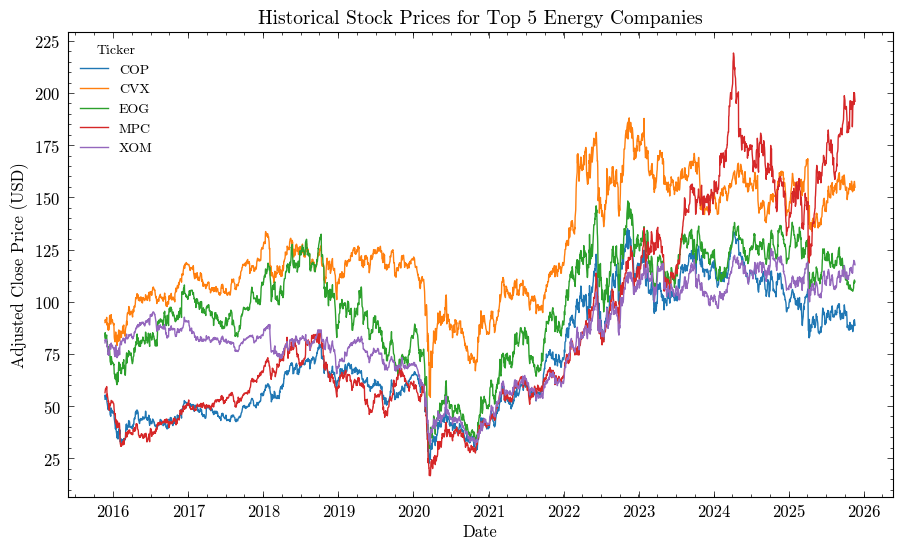

In [133]:

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("white")

for col in df.columns:
    if col != 'date':   # skip date column
        plt.plot(df['date'], df[col], label=col)
        
ax.set_title('Historical Stock Prices for Top 5 Energy Companies', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price (USD)')
ax.legend(title='Ticker')

plt.show()

In [134]:
index = ['XLE', 'SPY']

In [135]:

index_stock = await load_ibkr_prices(index, DURATION)

Connected to Interactive Brokers successfully.


In [136]:
index_stock

,date,SPY,XLE
0,2015-11-23,209.07,67.38
1,2015-11-24,209.35,68.82
2,2015-11-25,209.32,68.26
3,2015-11-27,209.56,67.77
4,2015-11-30,208.69,68.02
...,...,...,...
2506,2025-11-11,683.00,91.53
2507,2025-11-12,683.38,90.25
2508,2025-11-13,672.04,90.48
2509,2025-11-14,671.93,92.02


Text(0, 0.5, 'Adjusted Close Price (USD)')

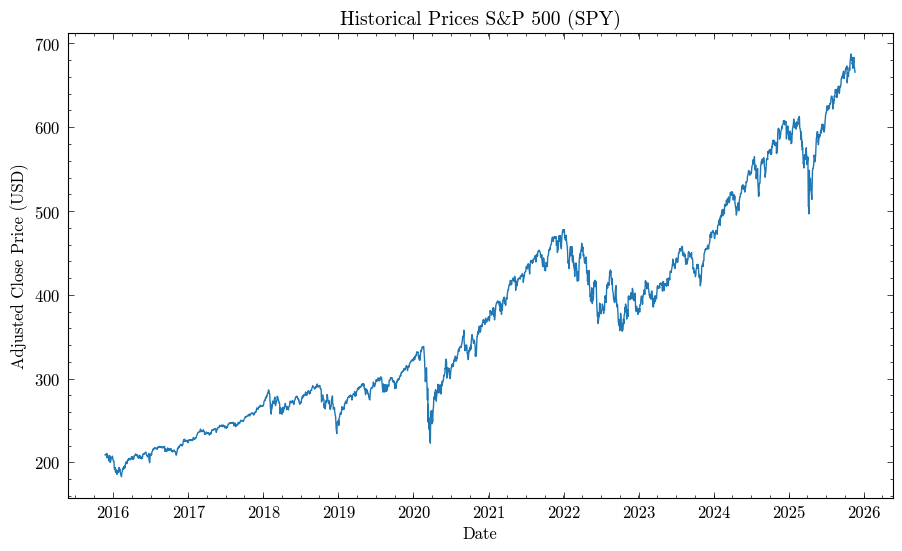

In [137]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("white")
ax.plot(index_stock['date'], index_stock['SPY'])

ax.set_title('Historical Prices S&P 500 (SPY)', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price (USD)')



Text(0, 0.5, 'Adjusted Close Price (USD)')

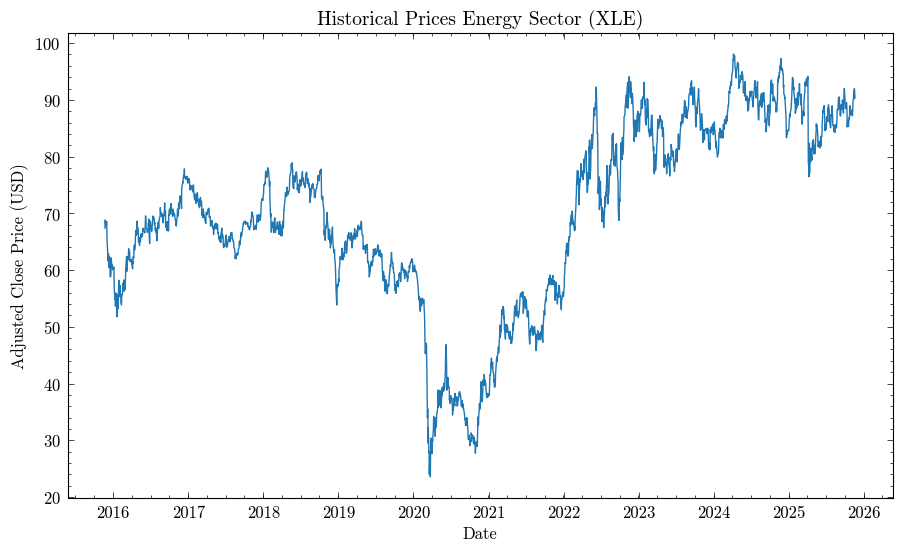

In [138]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("white")
ax.plot(index_stock['date'], index_stock['XLE'])

ax.set_title('Historical Prices Energy Sector (XLE)', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price (USD)')


### Daily Returns and Volatility

In [139]:
index_stock['XLE_r'] = transforms.log_returns(index_stock, 'XLE')
index_stock['SPY_r'] = transforms.log_returns(index_stock, 'SPY')

index_stock = index_stock.dropna()

# index_stock['XLE_vol']= transforms.realized_vol(index_stock['XLE_r'])
# index_stock['SPY_vol'] = transforms.realized_vol(index_stock['SPY_r'])


# index_stock = index_stock.dropna()


In [140]:
index_stock

,date,SPY,XLE,XLE_r,SPY_r
1,2015-11-24,209.35,68.82,0.021146,0.001338
2,2015-11-25,209.32,68.26,-0.008170,-0.000143
3,2015-11-27,209.56,67.77,-0.007204,0.001146
4,2015-11-30,208.69,68.02,0.003682,-0.004160
5,2015-12-01,210.68,68.56,0.007907,0.009490
...,...,...,...,...,...
2506,2025-11-11,683.00,91.53,0.012976,0.002287
2507,2025-11-12,683.38,90.25,-0.014083,0.000556
2508,2025-11-13,672.04,90.48,0.002545,-0.016733
2509,2025-11-14,671.93,92.02,0.016877,-0.000164


In [141]:
index_stock.loc[:, 'XLE_vol'] = transforms.realized_vol(index_stock['XLE_r'])
index_stock.loc[:, 'SPY_vol'] = transforms.realized_vol(index_stock['SPY_r'])


/tmp/ipykernel_59586/359503745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_stock.loc[:, 'XLE_vol'] = transforms.realized_vol(index_stock['XLE_r'])
/tmp/ipykernel_59586/359503745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_stock.loc[:, 'SPY_vol'] = transforms.realized_vol(index_stock['SPY_r'])


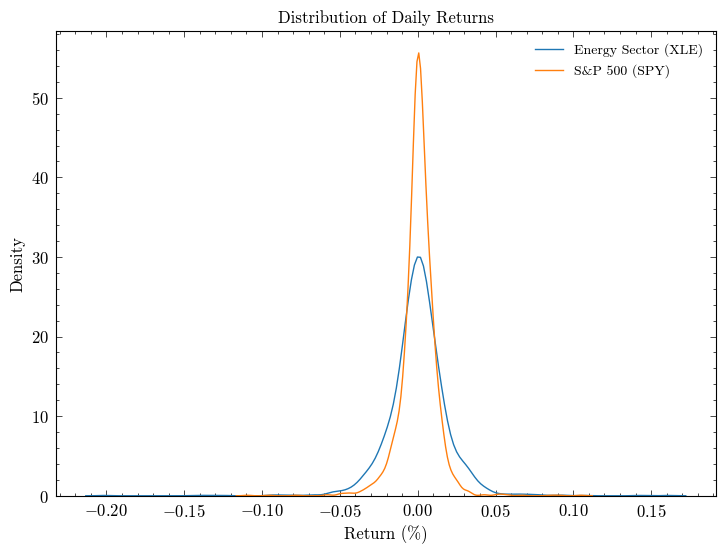

In [142]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(index_stock['XLE'].pct_change(), label = 'Energy Sector (XLE)')
sns.kdeplot(index_stock['SPY'].pct_change(), label = 'S&P 500 (SPY)')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return (%)')
plt.legend()

In [143]:
index_stock

,date,SPY,XLE,XLE_r,SPY_r,XLE_vol,SPY_vol
1,2015-11-24,209.35,68.82,0.021146,0.001338,NaN,NaN
2,2015-11-25,209.32,68.26,-0.008170,-0.000143,NaN,NaN
3,2015-11-27,209.56,67.77,-0.007204,0.001146,NaN,NaN
4,2015-11-30,208.69,68.02,0.003682,-0.004160,NaN,NaN
5,2015-12-01,210.68,68.56,0.007907,0.009490,NaN,NaN
...,...,...,...,...,...,...,...
2506,2025-11-11,683.00,91.53,0.012976,0.002287,0.140455,0.118185
2507,2025-11-12,683.38,90.25,-0.014083,0.000556,0.152096,0.117841
2508,2025-11-13,672.04,90.48,0.002545,-0.016733,0.151784,0.133257
2509,2025-11-14,671.93,92.02,0.016877,-0.000164,0.150424,0.130573


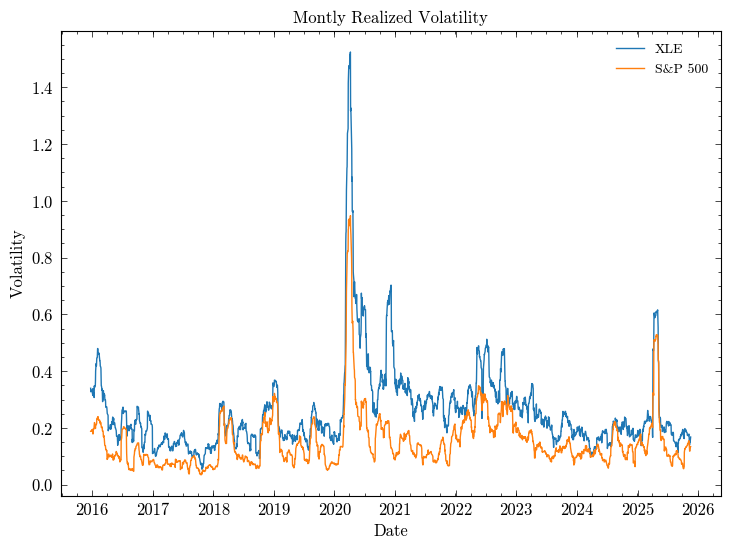

In [144]:



index_stock = index_stock.dropna()
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Montly Realized Volatility')
ax.plot(index_stock['date'], index_stock['XLE_vol'], label='XLE')
ax.plot(index_stock['date'], index_stock['SPY_vol'], label = 'S&P 500')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility')
plt.legend()